## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Necessary imports

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn as sk
from scipy.stats import zscore
%matplotlib inline

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
def inspect_df(df=df):
    display(df.describe().T)
    display(pd.concat([df.head(1).applymap(type), df.head(2)]).T)
    for i, col in enumerate(df):
        print('-------------------------------------')
        print(f'           {col} @ {i}')
        
        percent_nan = round(df[col].isna().sum() / len(df[col]), 4)
        if percent_nan > 0:
            print(f'Uh oh, {col} has {percent_nan} missing values   @@@@@@@@@@@@@@@')
        else:
            print('Good, no values missing.')
        if df[col].nunique() < 100:
            print(f"{col} seems to be discrete with {df[col].nunique()} unique values.")
            try:
                plt.figure(figsize=(8,8))
                sns.catplot(x=col, y=df['price'], data=df)
                plt.show()
            except Exception as e: 
                print(e)
                plt.show()
        else:
            print(f"{col} seems to be continuous.")
            plt.figure(figsize=(8,8))
            sns.scatterplot(x=col, y=df['price'], data=df, alpha=.3)
            plt.show()


count          mean           std           min  \
id             21597.0  4.580474e+09  2.876736e+09  1.000102e+06   
price          21597.0  5.402966e+05  3.673681e+05  7.800000e+04   
bedrooms       21597.0  3.373200e+00  9.262989e-01  1.000000e+00   
bathrooms      21597.0  2.115826e+00  7.689843e-01  5.000000e-01   
sqft_living    21597.0  2.080322e+03  9.181061e+02  3.700000e+02   
sqft_lot       21597.0  1.509941e+04  4.141264e+04  5.200000e+02   
floors         21597.0  1.494096e+00  5.396828e-01  1.000000e+00   
waterfront     19221.0  7.595859e-03  8.682485e-02  0.000000e+00   
view           21534.0  2.338627e-01  7.656862e-01  0.000000e+00   
condition      21597.0  3.409825e+00  6.505456e-01  1.000000e+00   
grade          21597.0  7.657915e+00  1.173200e+00  3.000000e+00   
sqft_above     21597.0  1.788597e+03  8.277598e+02  3.700000e+02   
yr_built       21597.0  1.971000e+03  2.937523e+01  1.900000e+03   
yr_renovated   17755.0  8.363678e+01  3.999464e+02  0.000000e+00   
zipcode        21597.0  9.807795e+04  5.351307e+01  9.800100e+04   
lat            21597.0  4.756009e+01  1.385518e-01  4.715590e+01   
long           21597.0 -1.222140e+02  1.407235e-01 -1.225190e+02   
sqft_living15  21597.0  1.986620e+03  6.852305e+02  3.990000e+02   
sqft_lot15     21597.0  1.275828e+04  2.727444e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.220000e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068500e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747110e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222310e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

0           0           1
id               <class 'int'>  7129300520  6414100192
date             <class 'str'>  10/13/2014   12/9/2014
price          <class 'float'>      221900      538000
bedrooms         <class 'int'>           3           3
bathrooms      <class 'float'>           1        2.25
sqft_living      <class 'int'>        1180        2570
sqft_lot         <class 'int'>        5650        7242
floors         <class 'float'>           1           2
waterfront     <class 'float'>         NaN           0
view           <class 'float'>           0           0
condition        <class 'int'>           3           3
grade            <class 'int'>           7           7
sqft_above       <class 'int'>        1180        2170
sqft_basement    <class 'str'>         0.0       400.0
yr_built         <class 'int'>        1955        1951
yr_renovated   <class 'float'>           0        1991
zipcode          <class 'int'>       98178       98125
lat            <class 'float'>     47.5112      47.721
long           <class 'float'>    -122.257    -122.319
sqft_living15    <class 'int'>        1340        1690
sqft_lot15       <class 'int'>        5650        7639

-------------------------------------
           id @ 0
Good, no values missing.
id seems to be continuous.


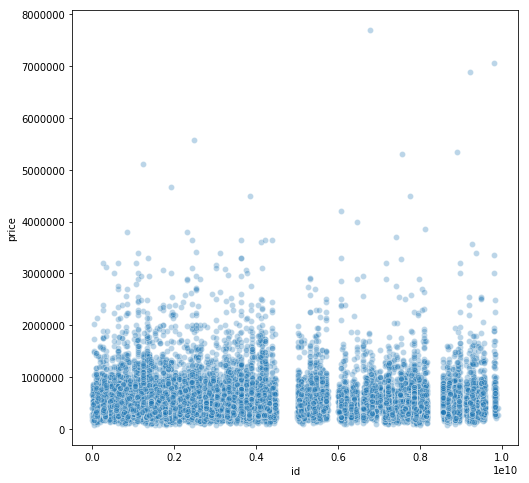

-------------------------------------
           date @ 1
Good, no values missing.
date seems to be continuous.


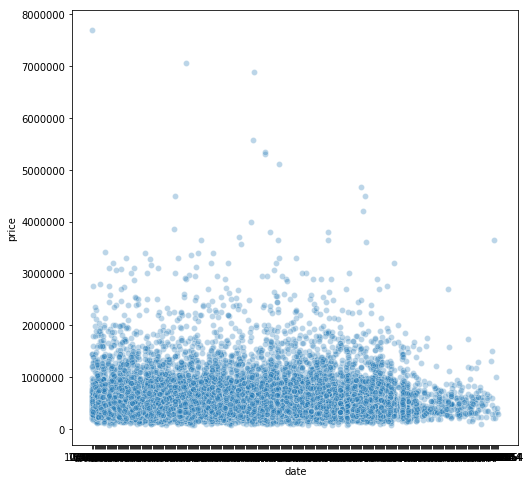

-------------------------------------
           price @ 2
Good, no values missing.
price seems to be continuous.


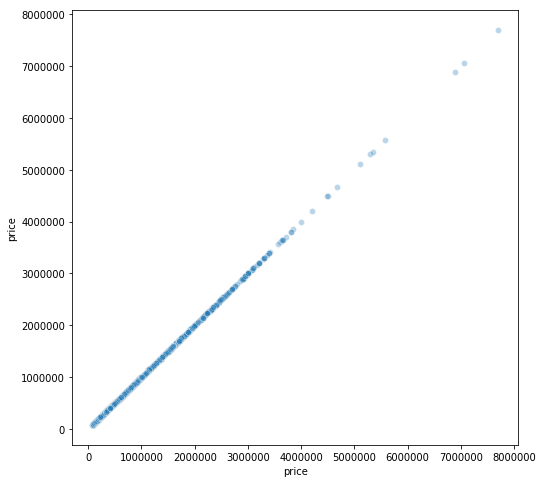

-------------------------------------
           bedrooms @ 3
Good, no values missing.
bedrooms seems to be discrete with 12 unique values.
invalid type comparison


/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


<Figure size 576x576 with 0 Axes>

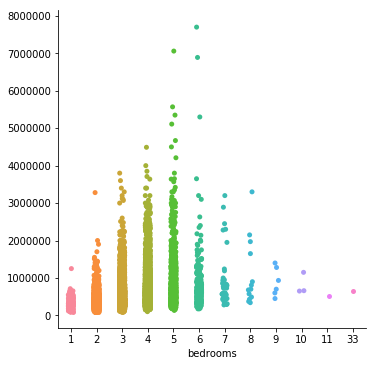

-------------------------------------
           bathrooms @ 4
Good, no values missing.
bathrooms seems to be discrete with 29 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

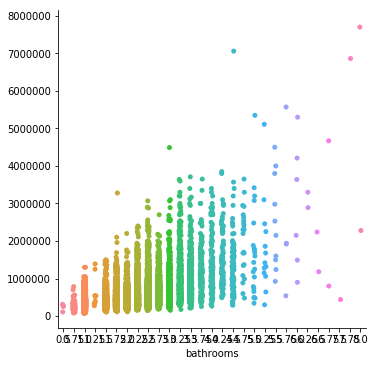

-------------------------------------
           sqft_living @ 5
Good, no values missing.
sqft_living seems to be continuous.


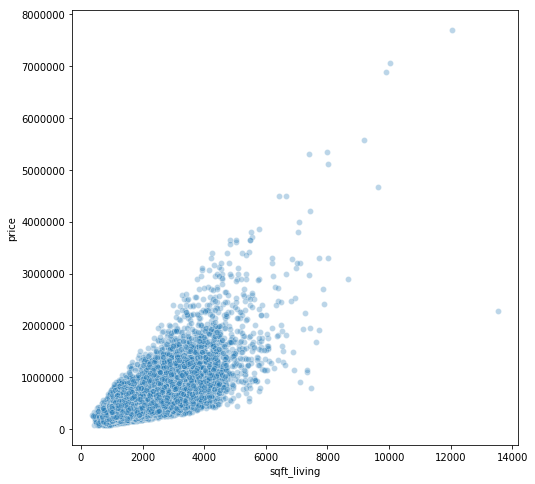

-------------------------------------
           sqft_lot @ 6
Good, no values missing.
sqft_lot seems to be continuous.


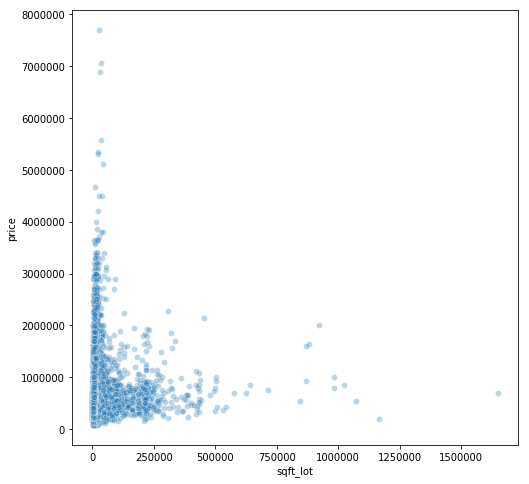

-------------------------------------
           floors @ 7
Good, no values missing.
floors seems to be discrete with 6 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

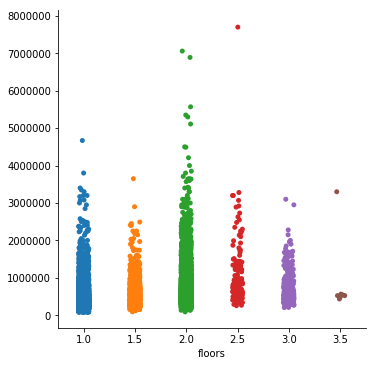

-------------------------------------
           waterfront @ 8
Uh oh, waterfront has 0.11 missing values   @@@@@@@@@@@@@@@
waterfront seems to be discrete with 2 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

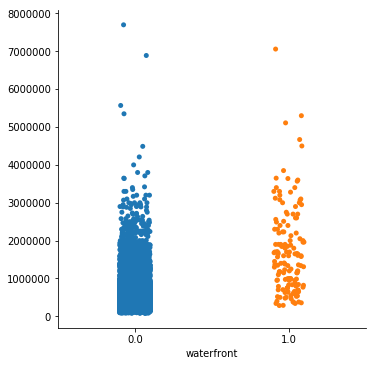

-------------------------------------
           view @ 9
Uh oh, view has 0.0029 missing values   @@@@@@@@@@@@@@@
view seems to be discrete with 5 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

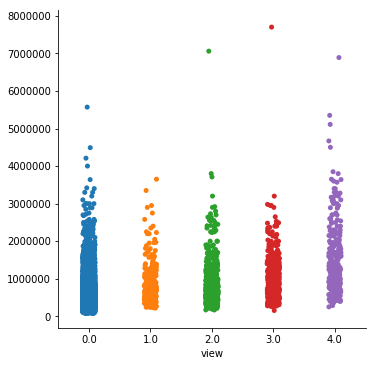

-------------------------------------
           condition @ 10
Good, no values missing.
condition seems to be discrete with 5 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

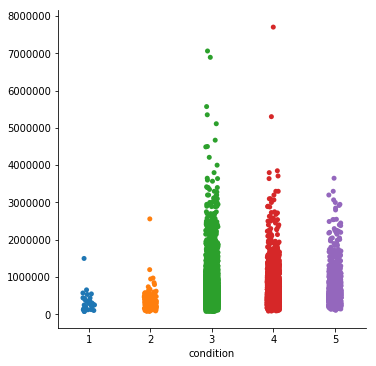

-------------------------------------
           grade @ 11
Good, no values missing.
grade seems to be discrete with 11 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

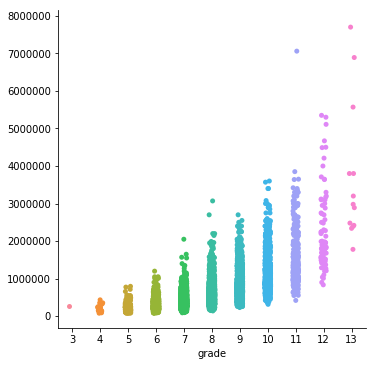

-------------------------------------
           sqft_above @ 12
Good, no values missing.
sqft_above seems to be continuous.


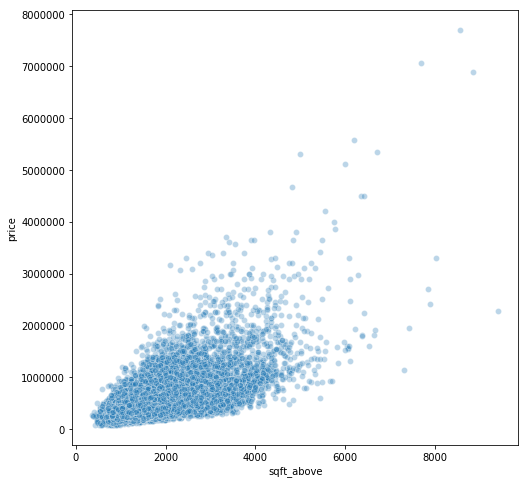

-------------------------------------
           sqft_basement @ 13
Good, no values missing.
sqft_basement seems to be continuous.


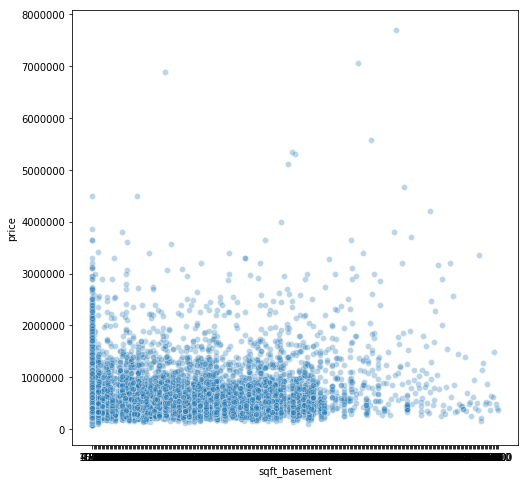

-------------------------------------
           yr_built @ 14
Good, no values missing.
yr_built seems to be continuous.


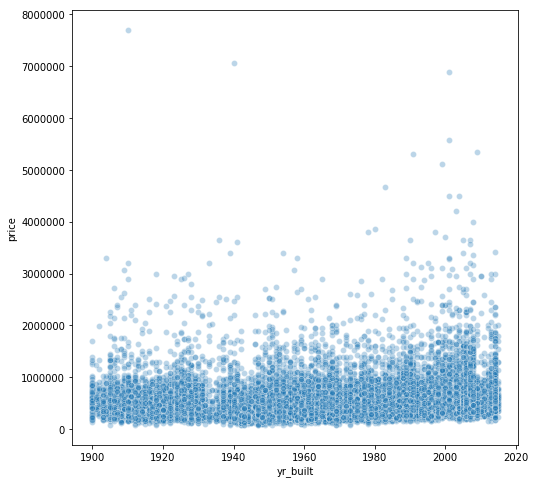

-------------------------------------
           yr_renovated @ 15
Uh oh, yr_renovated has 0.1779 missing values   @@@@@@@@@@@@@@@
yr_renovated seems to be discrete with 70 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

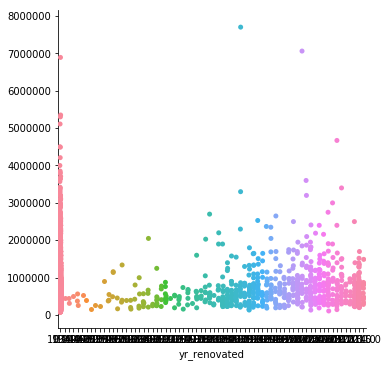

-------------------------------------
           zipcode @ 16
Good, no values missing.
zipcode seems to be discrete with 70 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

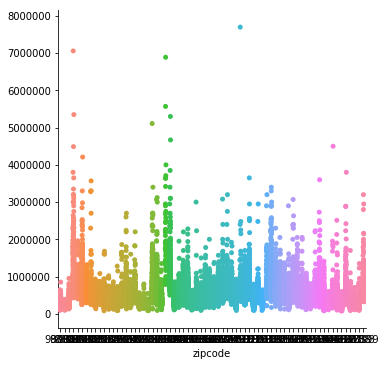

-------------------------------------
           lat @ 17
Good, no values missing.
lat seems to be continuous.


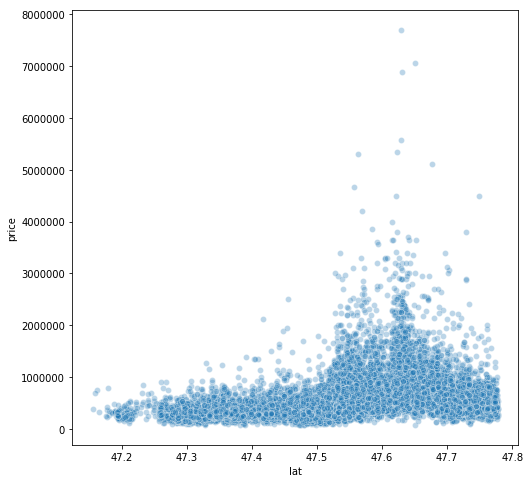

-------------------------------------
           long @ 18
Good, no values missing.
long seems to be continuous.


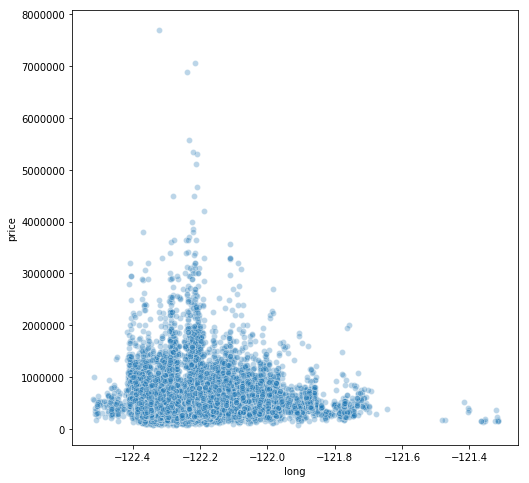

-------------------------------------
           sqft_living15 @ 19
Good, no values missing.
sqft_living15 seems to be continuous.


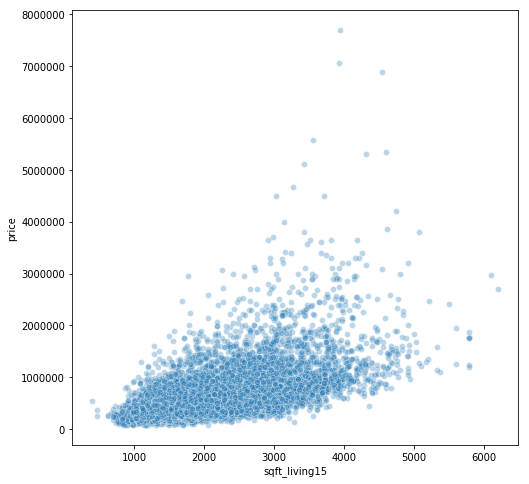

-------------------------------------
           sqft_lot15 @ 20
Good, no values missing.
sqft_lot15 seems to be continuous.


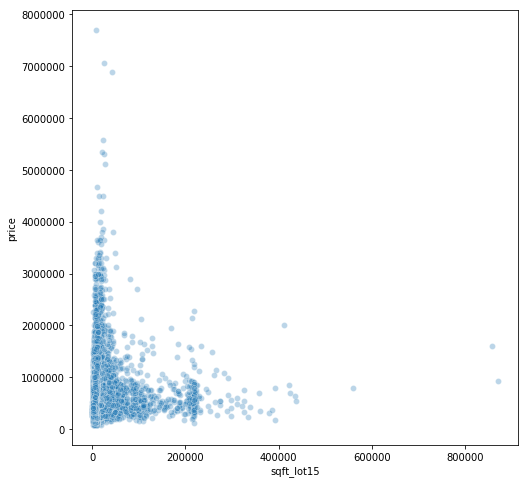

In [27]:
inspect_df()

In [18]:
df.id.value_counts().head(10)

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
Name: id, dtype: int64

In [22]:
df.loc[df.id == 795000620]

id        date     price  bedrooms  bathrooms  sqft_living  \
17588  795000620   9/24/2014  115000.0         3        1.0         1080   
17589  795000620  12/15/2014  124000.0         3        1.0         1080   
17590  795000620   3/11/2015  157000.0         3        1.0         1080   

       sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
17588      6250     1.0         0.0   0.0     ...          5        1080   
17589      6250     1.0         0.0   0.0     ...          5        1080   
17590      6250     1.0         NaN   0.0     ...          5        1080   

       sqft_basement yr_built  yr_renovated  zipcode      lat    long  \
17588            0.0     1950           0.0    98168  47.5045 -122.33   
17589            0.0     1950           0.0    98168  47.5045 -122.33   
17590            0.0     1950           NaN    98168  47.5045 -122.33   

       sqft_living15  sqft_lot15  
17588           1070        6250  
17589           1070        6250  
17590           1070        6250  

[3 rows x 21 columns]

In [19]:
df.loc[df['yr_renovated'] > 0, 'yr_renovated'].shape

(744,)

In [15]:
744 / len(df)

0.03444922905959161

We will be predicting the price, so let's pull that aside as a 'y' variable, and make a smaller dataframe of predictor variables. Since 'yr_renovated' only has 3.44% of usable data (something other than 0 or NaN) then we will drop this column from the predictors.

In [12]:
y = df['price'].copy()
X = df[['']]
X = df.drop(['price', 'yr_renovated'], axis=1)

3842

In [81]:
# give every a row a meaninful number for 'yr_renovated': replace 0 or NaN with 'yr_built' instead
df.loc[df['yr_renovated'].isna(), 'yr_renovated'] = df.loc[df['yr_renovated'].isna(), 'yr_built']
df.loc[df['yr_renovated'] == 0, 'yr_renovated'] = df.loc[df['yr_renovated'] == 0, 'yr_built']
df[['yr_built','yr_renovated']].loc[df.yr_built != df.yr_renovated].shape

(744, 2)

In [82]:
# Same process as above for 'waterfront' and 'view', we replaced with the MODE of each series (0 in both cases)
# since they are categorical and the MEAN wouldn't make sense
df.loc[df.waterfront.isna(), 'waterfront'] = df.waterfront.mode()
df.loc[df.view.isna(), 'view'] = df.view.mode()

count          mean           std           min  \
id             21597.0  4.580474e+09  2.876736e+09  1.000102e+06   
price          21597.0  5.402966e+05  3.673681e+05  7.800000e+04   
bedrooms       21597.0  3.373200e+00  9.262989e-01  1.000000e+00   
bathrooms      21597.0  2.115826e+00  7.689843e-01  5.000000e-01   
sqft_living    21597.0  2.080322e+03  9.181061e+02  3.700000e+02   
sqft_lot       21597.0  1.509941e+04  4.141264e+04  5.200000e+02   
floors         21597.0  1.494096e+00  5.396828e-01  1.000000e+00   
waterfront     19222.0  7.595464e-03  8.682260e-02  0.000000e+00   
view           21534.0  2.338627e-01  7.656862e-01  0.000000e+00   
condition      21597.0  3.409825e+00  6.505456e-01  1.000000e+00   
grade          21597.0  7.657915e+00  1.173200e+00  3.000000e+00   
sqft_above     21597.0  1.788597e+03  8.277598e+02  3.700000e+02   
yr_built       21597.0  1.971000e+03  2.937523e+01  1.900000e+03   
yr_renovated   21597.0  1.972945e+03  2.894539e+01  1.900000e+03   
zipcode        21597.0  9.807795e+04  5.351307e+01  9.800100e+04   
lat            21597.0  4.756009e+01  1.385518e-01  4.715590e+01   
long           21597.0 -1.222140e+02  1.407235e-01 -1.225190e+02   
sqft_living15  21597.0  1.986620e+03  6.852305e+02  3.990000e+02   
sqft_lot15     21597.0  1.275828e+04  2.727444e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.220000e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068500e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   1.954000e+03  1.977000e+03  1.999000e+03  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747110e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222310e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

0           0           1
id               <class 'int'>  7129300520  6414100192
date             <class 'str'>  10/13/2014   12/9/2014
price          <class 'float'>      221900      538000
bedrooms         <class 'int'>           3           3
bathrooms      <class 'float'>           1        2.25
sqft_living      <class 'int'>        1180        2570
sqft_lot         <class 'int'>        5650        7242
floors         <class 'float'>           1           2
waterfront     <class 'float'>           0           0
view           <class 'float'>           0           0
condition        <class 'int'>           3           3
grade            <class 'int'>           7           7
sqft_above       <class 'int'>        1180        2170
sqft_basement    <class 'str'>         0.0       400.0
yr_built         <class 'int'>        1955        1951
yr_renovated   <class 'float'>        1955        1991
zipcode          <class 'int'>       98178       98125
lat            <class 'float'>     47.5112      47.721
long           <class 'float'>    -122.257    -122.319
sqft_living15    <class 'int'>        1340        1690
sqft_lot15       <class 'int'>        5650        7639

-------------------------------------
           id @ 0
Good, no values missing.
id seems to be continuous.


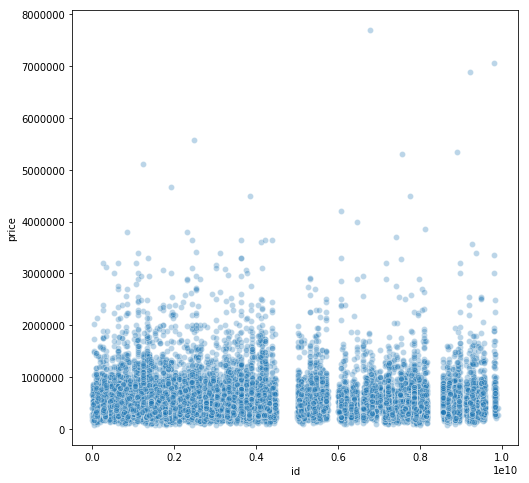

-------------------------------------
           date @ 1
Good, no values missing.
date seems to be continuous.


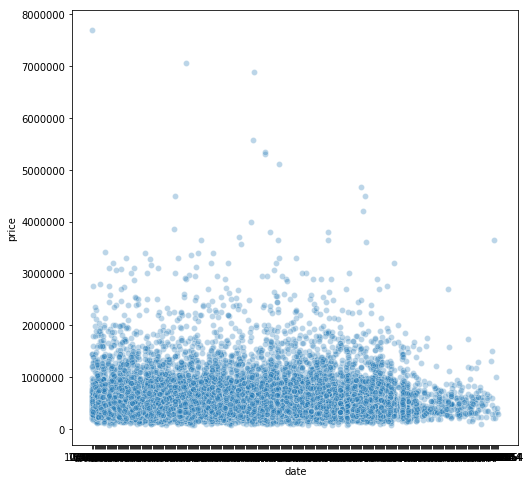

-------------------------------------
           price @ 2
Good, no values missing.
price seems to be continuous.


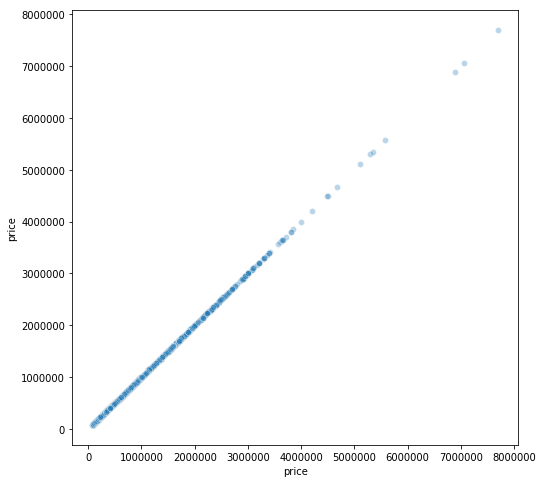

-------------------------------------
           bedrooms @ 3
Good, no values missing.
bedrooms seems to be discrete with 12 unique values.
invalid type comparison


/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


<Figure size 576x576 with 0 Axes>

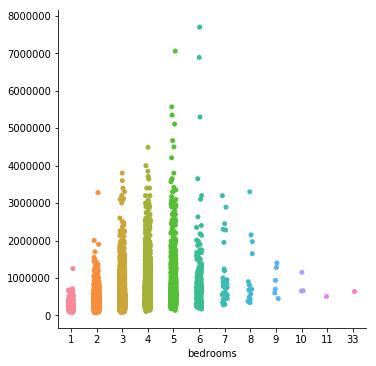

-------------------------------------
           bathrooms @ 4
Good, no values missing.
bathrooms seems to be discrete with 29 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

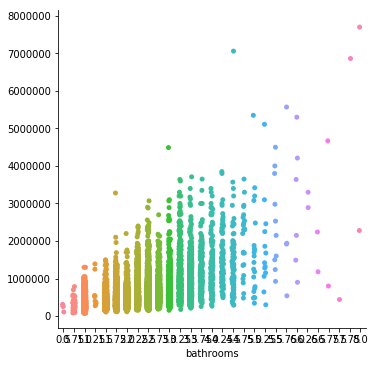

-------------------------------------
           sqft_living @ 5
Good, no values missing.
sqft_living seems to be continuous.


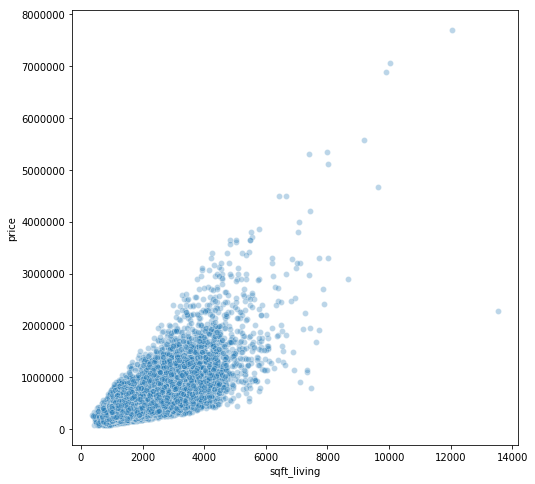

-------------------------------------
           sqft_lot @ 6
Good, no values missing.
sqft_lot seems to be continuous.


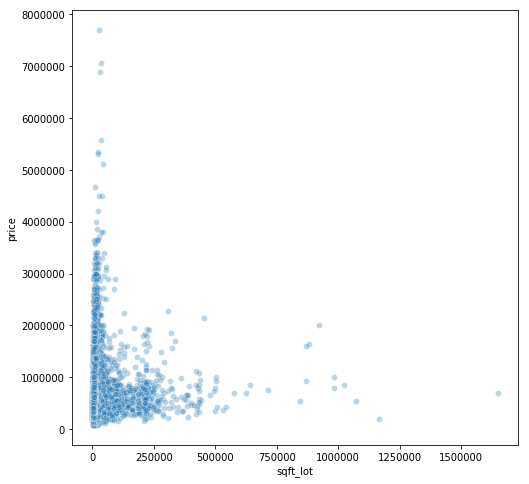

-------------------------------------
           floors @ 7
Good, no values missing.
floors seems to be discrete with 6 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

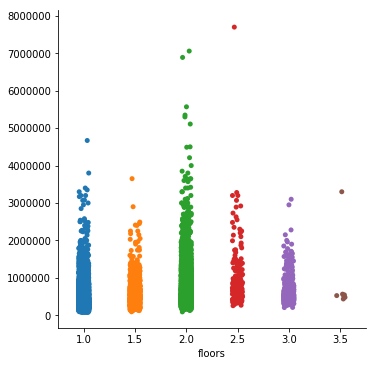

-------------------------------------
           waterfront @ 8
Uh oh, waterfront has 0.11 missing values
waterfront seems to be discrete with 2 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

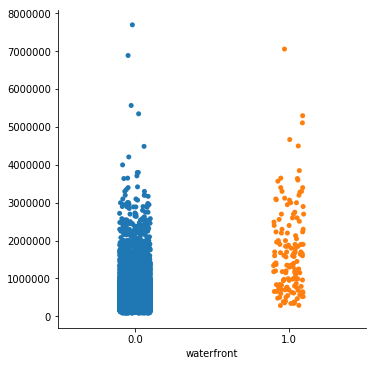

-------------------------------------
           view @ 9
Uh oh, view has 0.0029 missing values
view seems to be discrete with 5 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

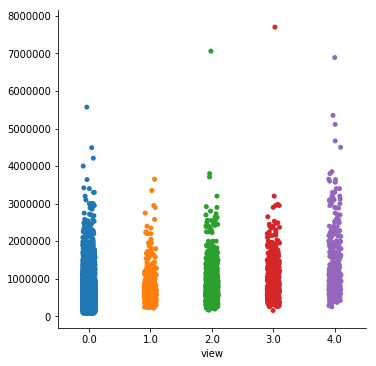

-------------------------------------
           condition @ 10
Good, no values missing.
condition seems to be discrete with 5 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

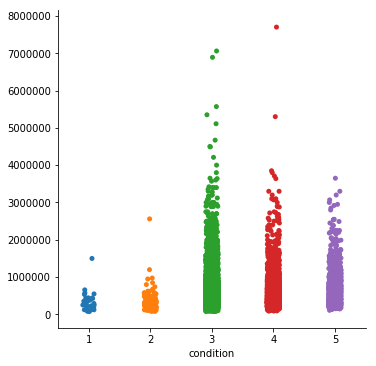

-------------------------------------
           grade @ 11
Good, no values missing.
grade seems to be discrete with 11 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

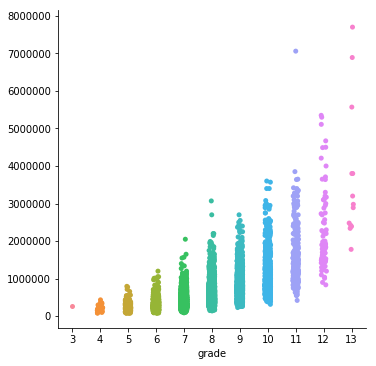

-------------------------------------
           sqft_above @ 12
Good, no values missing.
sqft_above seems to be continuous.


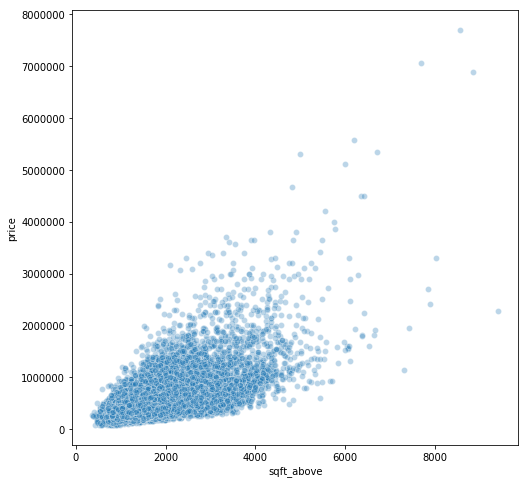

-------------------------------------
           sqft_basement @ 13
Good, no values missing.
sqft_basement seems to be continuous.


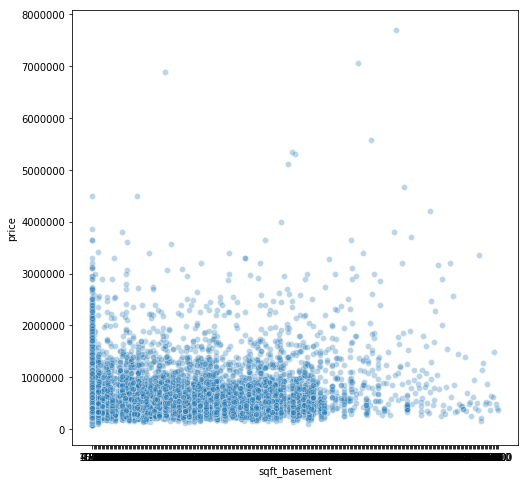

-------------------------------------
           yr_built @ 14
Good, no values missing.
yr_built seems to be continuous.


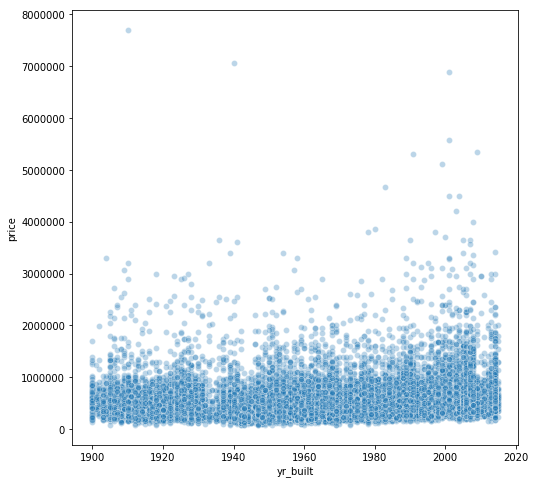

-------------------------------------
           yr_renovated @ 15
Good, no values missing.
yr_renovated seems to be continuous.


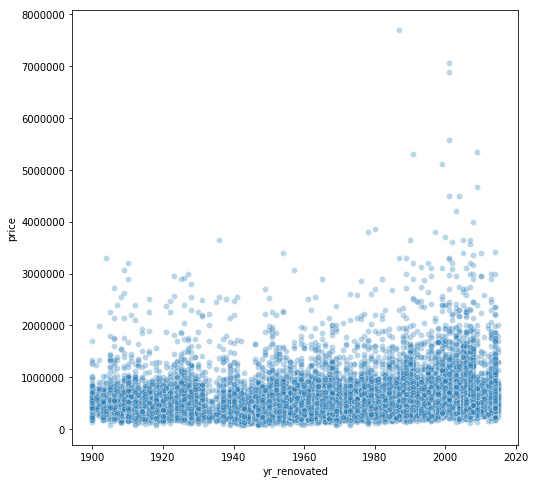

-------------------------------------
           zipcode @ 16
Good, no values missing.
zipcode seems to be discrete with 70 unique values.
invalid type comparison


<Figure size 576x576 with 0 Axes>

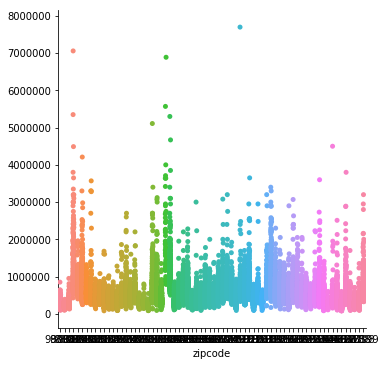

-------------------------------------
           lat @ 17
Good, no values missing.
lat seems to be continuous.


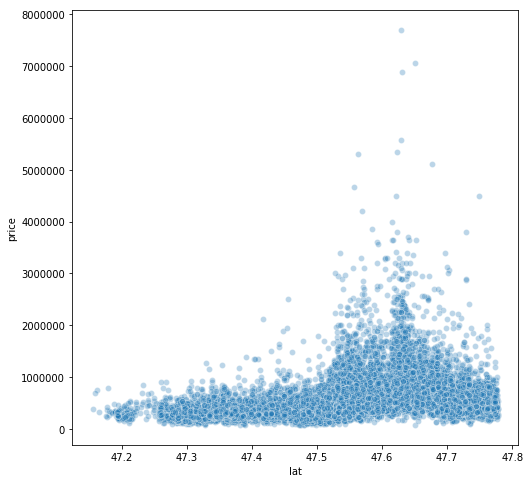

-------------------------------------
           long @ 18
Good, no values missing.
long seems to be continuous.


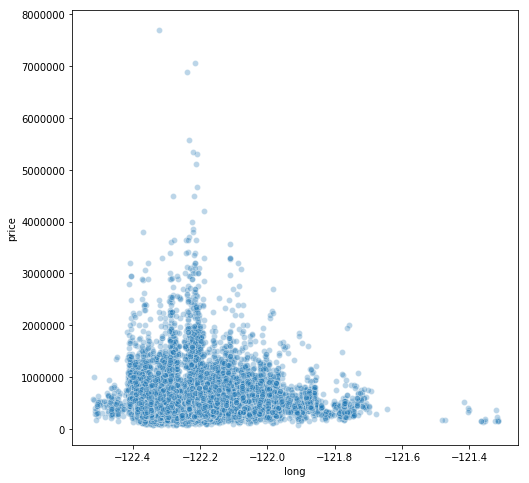

-------------------------------------
           sqft_living15 @ 19
Good, no values missing.
sqft_living15 seems to be continuous.


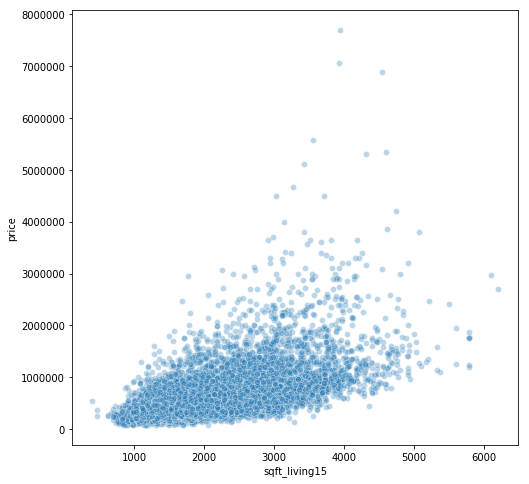

-------------------------------------
           sqft_lot15 @ 20
Good, no values missing.
sqft_lot15 seems to be continuous.


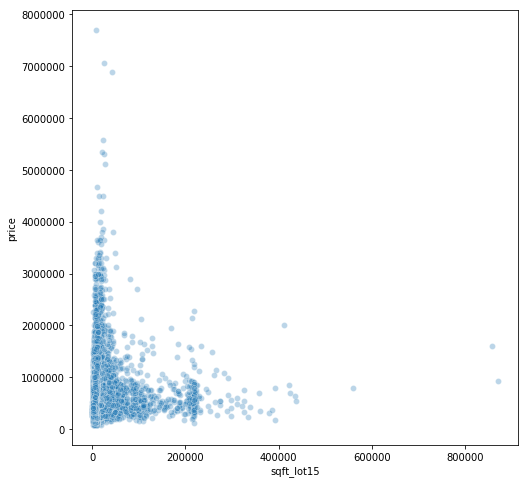

In [83]:
inspect_df()

In [77]:
df.loc[df['bathrooms'] > 6]

id        date      price  bedrooms  bathrooms  sqft_living  \
4020   9175600025   10/7/2014   800000.0         7       6.75         7480   
7245   6762700020  10/13/2014  7700000.0         6       8.00        12050   
8085   1924059029   6/17/2014  4670000.0         5       6.75         9640   
8537    424049043   8/11/2014   450000.0         9       7.50         4050   
9245   9208900037   9/19/2014  6890000.0         6       7.75         9890   
12764  1225069038    5/5/2014  2280000.0         7       8.00        13540   
14542  2303900035   6/11/2014  2890000.0         5       6.25         8670   
18288  6072800246    7/2/2014  3300000.0         5       6.25         8020   
20562   424069279   3/28/2015  1180000.0         6       6.50         6260   
21490  2524069097    5/9/2014  2240000.0         5       6.50         7270   

       sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
4020      41664     2.0         0.0   2.0     ...         11        5080   
7245      27600     2.5         0.0   3.0     ...         13        8570   
8085      13068     1.0         1.0   4.0     ...         12        4820   
8537       6504     2.0         0.0   0.0     ...          7        4050   
9245      31374     2.0         0.0   4.0     ...         13        8860   
12764    307752     3.0         0.0   4.0     ...         12        9410   
14542     64033     2.0         0.0   4.0     ...         13        6120   
18288     21738     2.0         0.0   0.0     ...         11        8020   
20562     10955     2.0         NaN   0.0     ...         11        4840   
21490    130017     2.0         0.0   0.0     ...         12        6420   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
4020          2400.0     1953        1953.0    98166  47.4643 -122.368   
7245          3480.0     1910        1987.0    98102  47.6298 -122.323   
8085          4820.0     1983        2009.0    98040  47.5570 -122.210   
8537             0.0     1996        1996.0    98144  47.5923 -122.301   
9245          1030.0     2001        2001.0    98039  47.6305 -122.240   
12764         4130.0     1999        1999.0    98053  47.6675 -121.986   
14542         2550.0     1965        1965.0    98177  47.7295 -122.372   
18288            0.0     2001        2001.0    98006  47.5675 -122.189   
20562         1420.0     2007        2007.0    98075  47.5947 -122.039   
21490          850.0     2010        2010.0    98027  47.5371 -121.982   

       sqft_living15  sqft_lot15  
4020            2810       33190  
7245            3940        8800  
8085            3270       10454  
8537            1448        3866  
9245            4540       42730  
12764           4850      217800  
14542           4140       81021  
18288           4160       18969  
20562           2710       12550  
21490           1800       44890  

[10 rows x 21 columns]

In [84]:
df.loc[df['yr_renovated'] < 1]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

In [68]:
df.sqft_living15.values

array([1340, 1690, 2720, ..., 1020, 1410, 1020])

Score: 0.4760811648716527


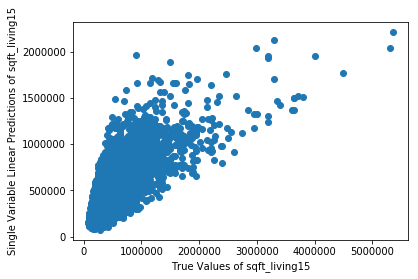

In [100]:
from sklearn.linear_model import LinearRegression
possible_single_var = ['sqft_living', 'sqft_above', 'sqft_living15']
#for col in possible_single_var:
y = df[['price']]
X = df[['sqft_living']]
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3)
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)
predictions = linreg.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel(f"True Values of {col}")
plt.ylabel(f"Single Variable Linear Predictions of {col}")
print("Score:", model.score(X_test, y_test))

In [91]:
possible_single_var = ['sqft_living', 'sqft_above', 'sqft_living15']
for col in possible_single_var:    
    X = df[col]
    y = df['price']

    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 1.124e+05
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:49:23   Log-Likelihood:            -3.0011e+05
No. Observations:               21597   AIC:                         6.002e+05
Df Residuals:                   21596   BIC:                         6.002e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   263.1647      0.785    335.319      0.000     261.626     264.703
==============================================================================
Omnibus:                    16021.993   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           689028.909
Skew:                           3.128   Prob(JB):                         0.00
Kurtosis:                      29.955   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                 8.544e+04
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:49:23   Log-Likelihood:            -3.0254e+05
No. Observations:               21597   AIC:                         6.051e+05
Df Residuals:                   21596   BIC:                         6.051e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sqft_above   296.1851      1.013    292.303      0.000     294.199     298.171
==============================================================================
Omnibus:                    15075.896   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           548598.760
Skew:                           2.903   Prob(JB):                         0.00
Kurtosis:                      26.998   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                 8.145e+04
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:49:23   Log-Likelihood:            -3.0295e+05
No. Observations:               21597   AIC:                         6.059e+05
Df Residuals:                   21596   BIC:                         6.059e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living15   276.4111      0.969    285.392      0.000     274.513     278.310
==============================================================================
Omnibus:                    20915.538   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2129784.206
Skew:                           4.465   Prob(JB):                         0.00
Kurtosis:                      50.823   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now let's begin finding which variables we want to use for multi-linear regression. We'd like to avoid using too much co-linear data, so we'll use a scatter matrix, we'll also scale certain columns using standard scalar so that x_bar = 0 and x_st_dev = 1.0

In [144]:
basement_med = pd.to_numeric(df['sqft_basement'].loc[df['sqft_basement'] != '?']).median()
basement_med


0.0

In [149]:
explore_df = df.drop(['id', 'price', 'yr_renovated', 'lat', 'long', 'sqft_basement', 'zipcode', 'date'], axis=1)
explore_df.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0         NaN   0.0   
1         3       2.25         2570      7242     2.0         0.0   0.0   
2         2       1.00          770     10000     1.0         0.0   0.0   
3         4       3.00         1960      5000     1.0         0.0   0.0   
4         3       2.00         1680      8080     1.0         0.0   0.0   

   condition  grade  sqft_above  yr_built  sqft_living15  sqft_lot15  
0          3      7        1180      1955           1340        5650  
1          3      7        2170      1951           1690        7639  
2          3      6         770      1933           2720        8062  
3          5      7        1050      1965           1360        5000  
4          3      8        1680      1987           1800        7503

In [150]:
explore_df.loc[explore_df.waterfront.isna(), 'waterfront'] = explore_df.waterfront.median()
explore_df.loc[explore_df.view.isna(), 'view'] = explore_df.view.median()

In [ ]:
print(df['price'].shape)
explore_df.shape
together = explore_df.merge(df['price'])
together.head()

#no_outliers = explore_df[(np.abs(zscore(explore_df)) < 3).all(axis=1)]


Let's do our first multi-linear regression just using columns that are already encoded as numbers. There will be some co-linear columns here that will lead to overfitting, but it's a benchmark to compare with our earlier single variable analysis using 'sqft_living' which gave us a test score around .50

In [5]:

y = df[['price']]
X = explore_df
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2)
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)
predictions = linreg.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel(f"True Values")
plt.ylabel(f"Multi Variable Linear Predictions")
print("Score:", model.score(X_test, y_test))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-f69703606ec1>", line 3, in <module>
    X = explore_df
NameError: name 'explore_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1095, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/anaconda3/envs/learn-e

NameError: name 'explore_df' is not defined

In [114]:
plt.figure(figsize=(15,15))
pd.plotting.scatter_matrix(explore_df)
plt.show()

<Figure size 1080x1080 with 0 Axes>

KeyboardInterrupt: 